In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from mlxtend.preprocessing import minmax_scaling
from scipy import stats

In [3]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df.drop(['Id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,Total_Missing,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


<AxesSubplot:>

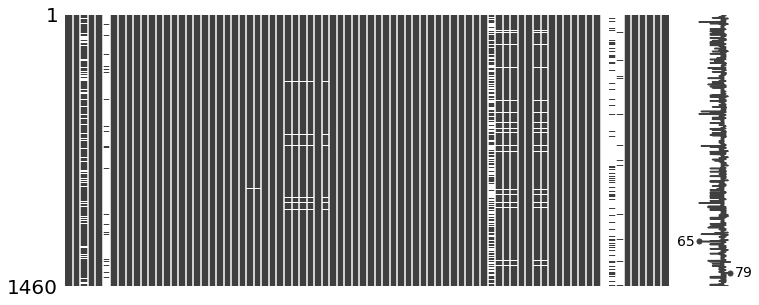

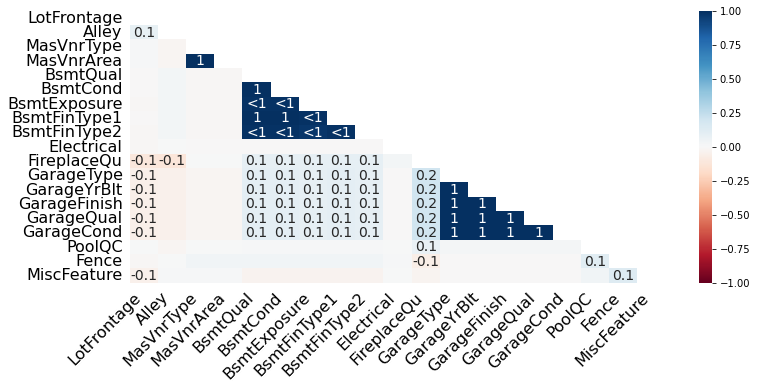

In [4]:
# Duplicate removal
df.drop_duplicates(inplace=True)

# Missing data display 
total = df.isnull().sum().sort_values(ascending=False)  
percent = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)  
missing_data = pd.concat([total, percent], axis=1, keys=['Total_Missing', 'Percent'])
display(missing_data[missing_data['Total_Missing'] != 0])


msno.matrix(df,figsize=(12,5)) 
msno.heatmap(df,figsize=(12,5))

In [5]:
# Missing data dealing
df.fillna(value={'PoolQC':-1,'Alley':-1,'Fence':-1,'MiscFeature':-1,'FireplaceQu':-1,'LotFrontage':-1,'GarageYrBlt':-1,'GarageCond':-1,'GarageType':-1,
                 'GarageFinish':-1,'GarageQual':-1,'BsmtExposure':-1,'BsmtFinType2':-1,'BsmtCond':-1,
                 'BsmtQual':-1,'BsmtFinType1':-1,'MasVnrArea':-1,'MasVnrType':-1,'Electrical':-1})

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,FR2,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,Corner,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,FR2,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,MnPrv,-1,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,-1,Reg,Lvl,AllPub,Inside,...,0,-1,-1,-1,0,4,2010,WD,Normal,142125


In [6]:
display(df.columns)
categorical_object = ['MSZoning','Street','FireplaceQu','LotShape','LandContour','Utilities','LotConfig',
                      'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle',
                      'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation',
                      'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                      'Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
                      'GarageCond','PavedDrive','SaleType','SaleCondition']
categorical_numeric = ['MSSubClass','OverallQual','OverallCond']
continuous = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
              'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
              'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
target = 'SalePrice'

# # Single variable quick analysis
# feature = '1stFlrSF' 
# display(df[feature].head())
# sns.catplot(x=feature, kind="count", data=df)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

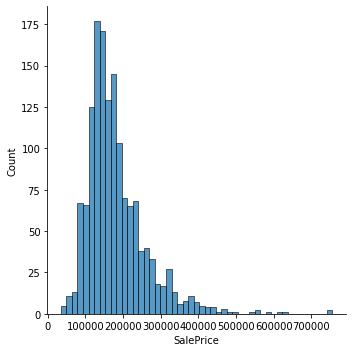

In [7]:
sns.displot(df['SalePrice'])

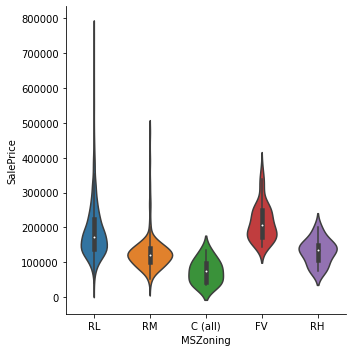

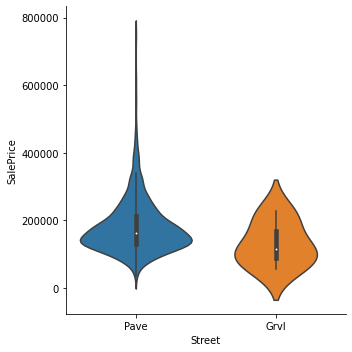

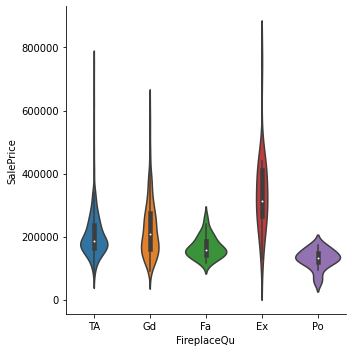

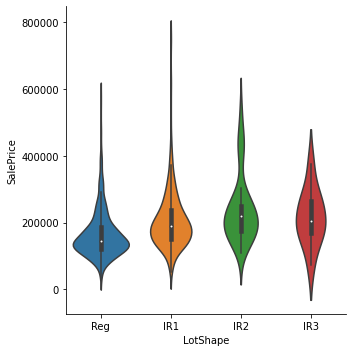

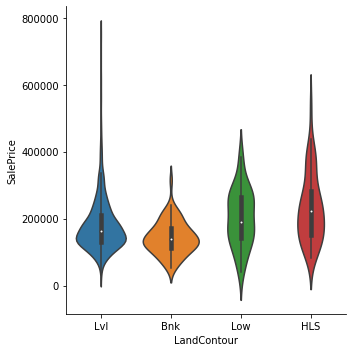

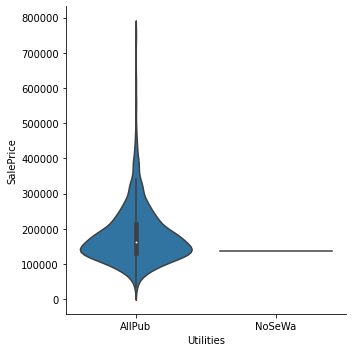

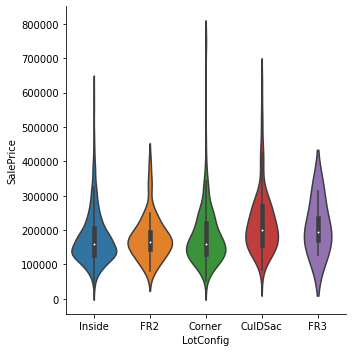

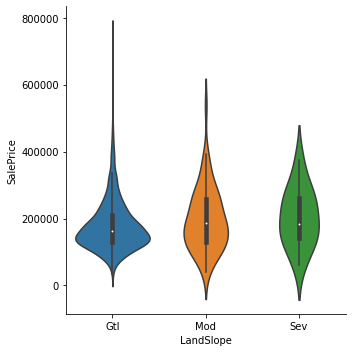

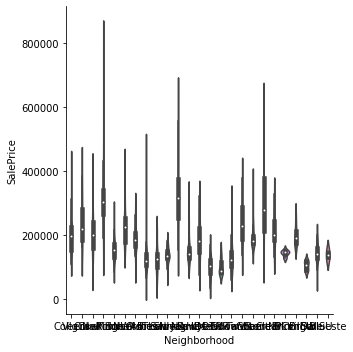

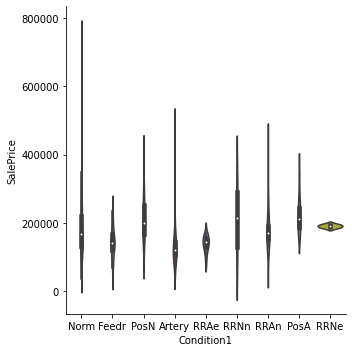

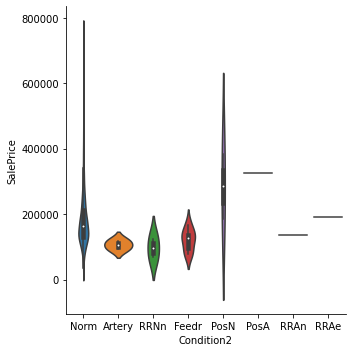

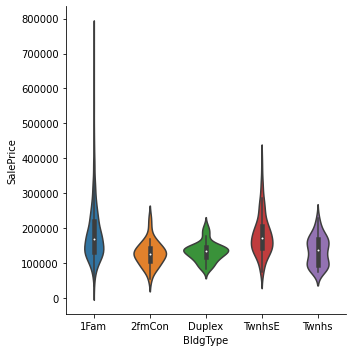

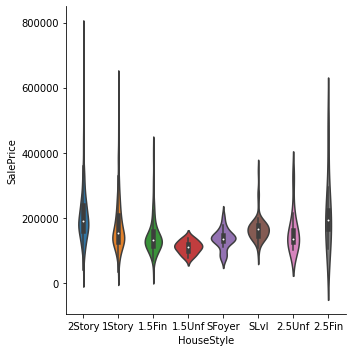

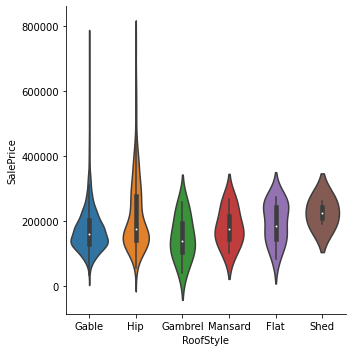

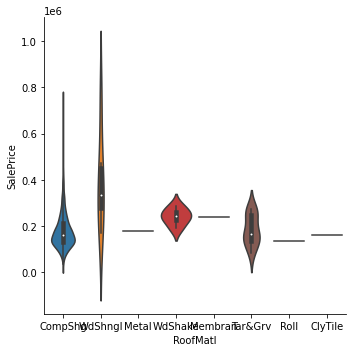

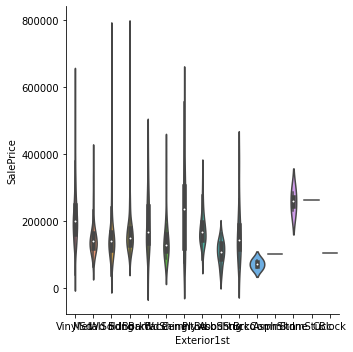

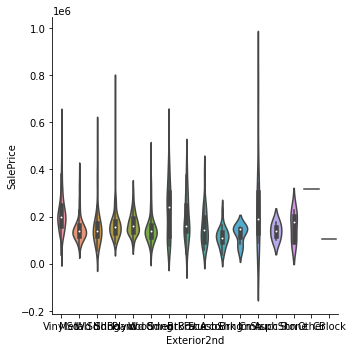

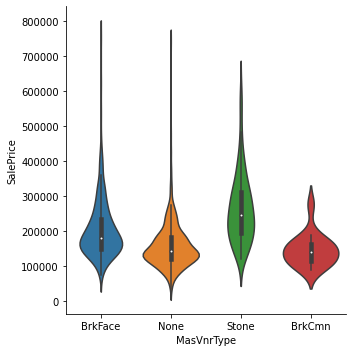

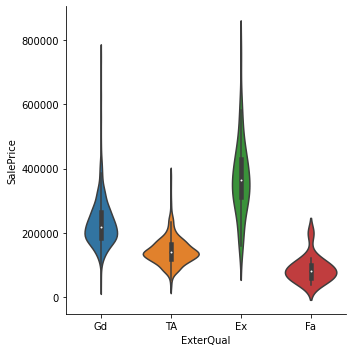

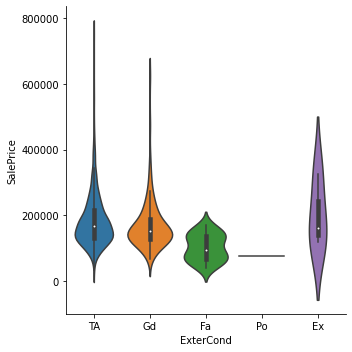

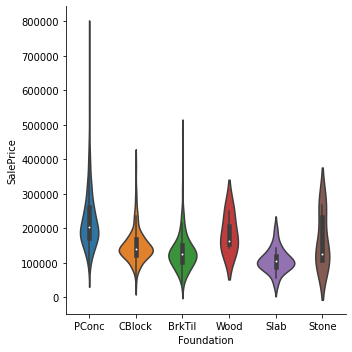

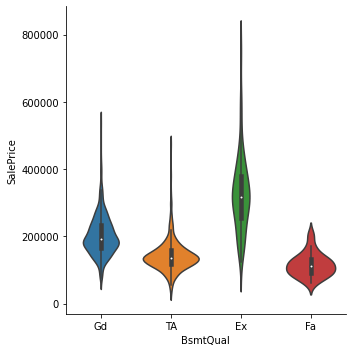

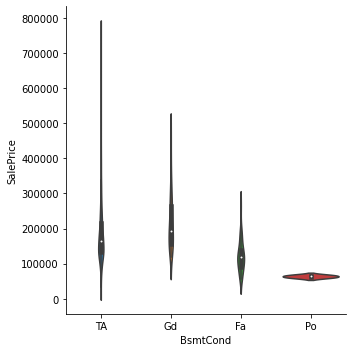

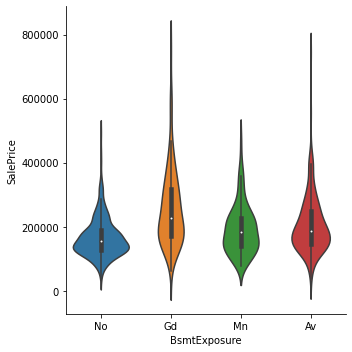

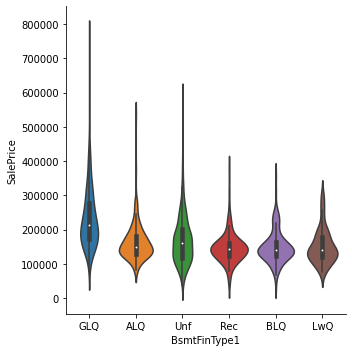

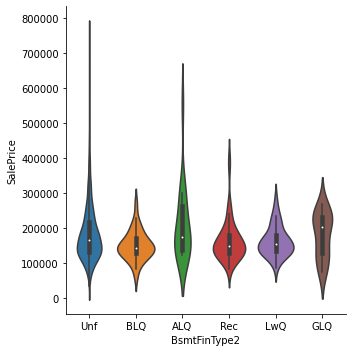

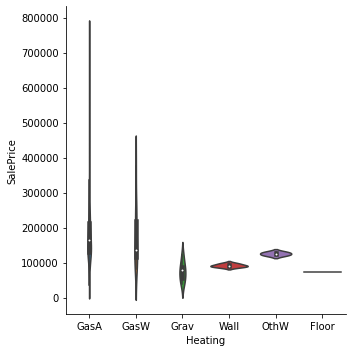

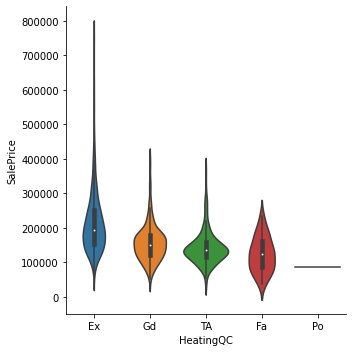

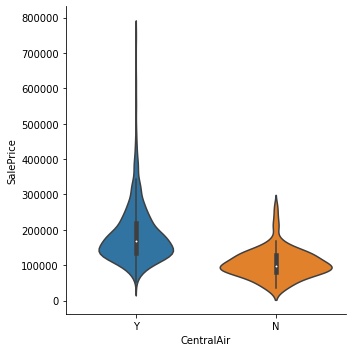

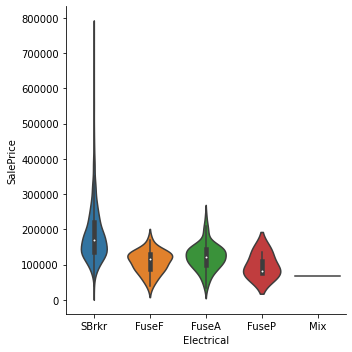

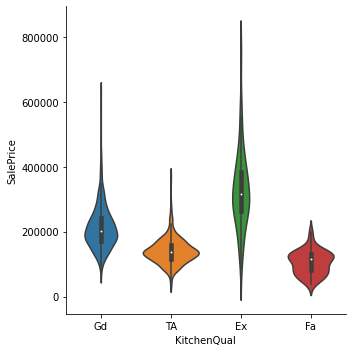

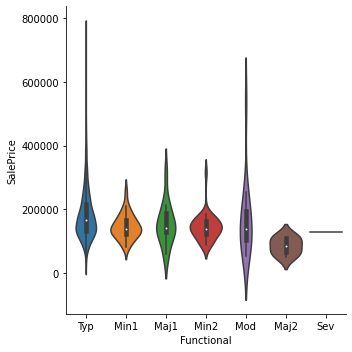

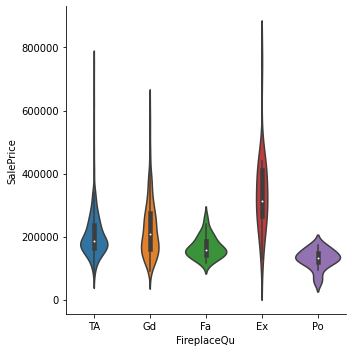

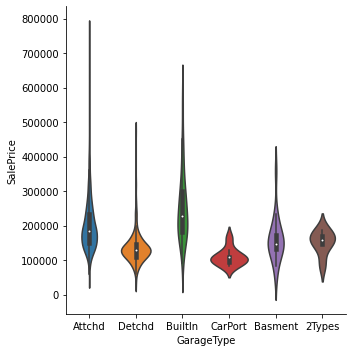

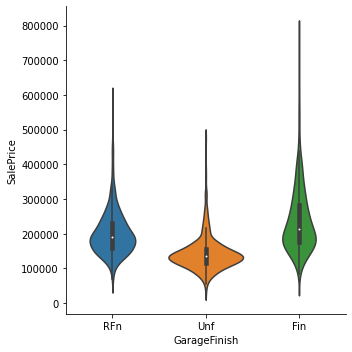

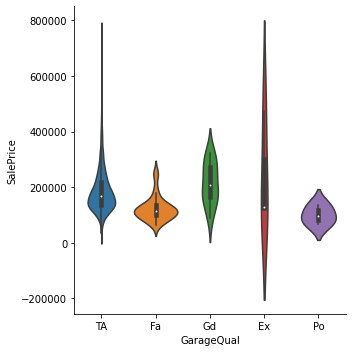

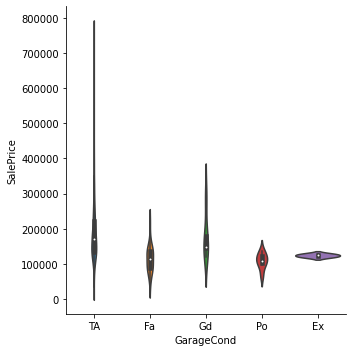

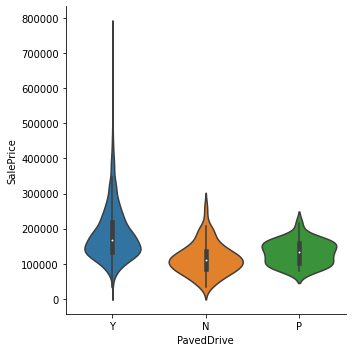

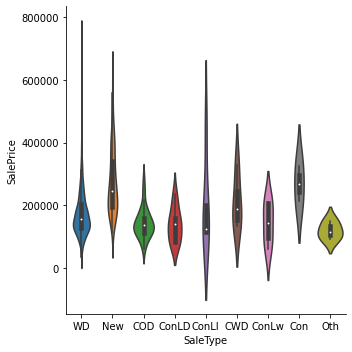

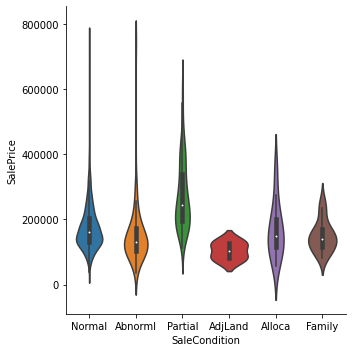

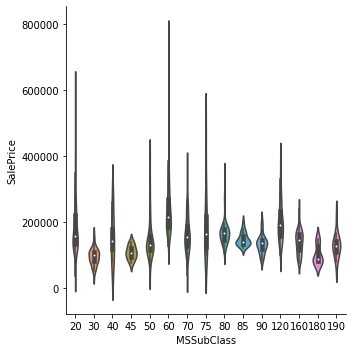

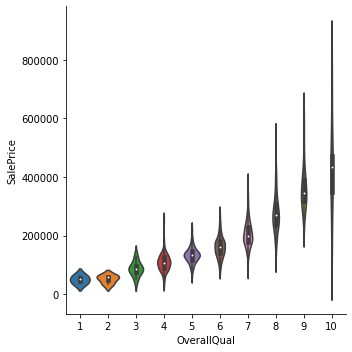

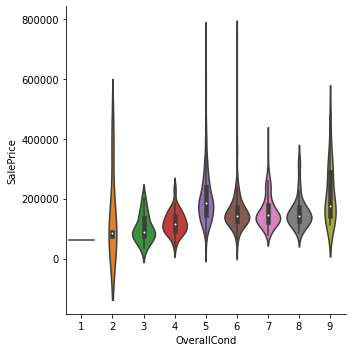

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


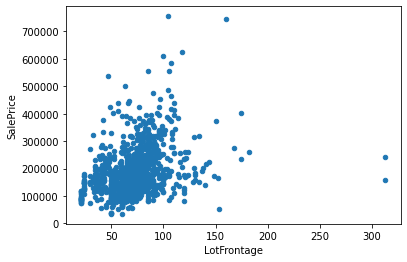

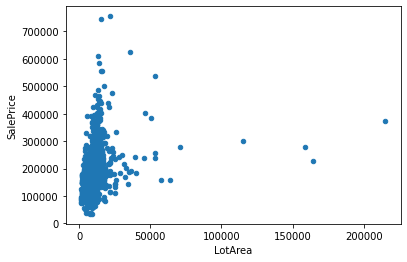

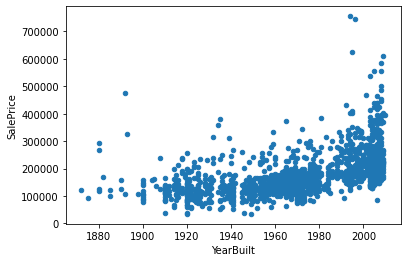

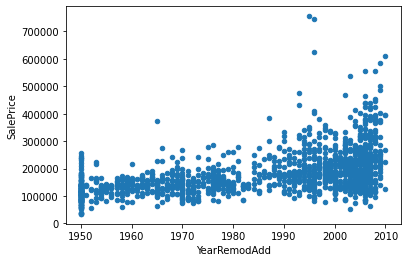

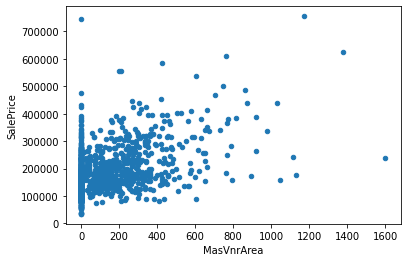

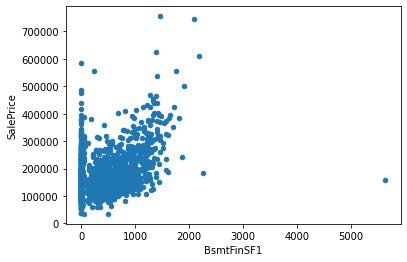

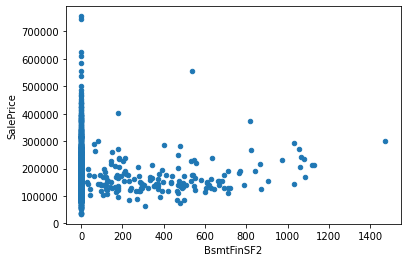

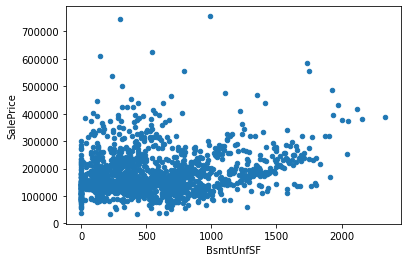

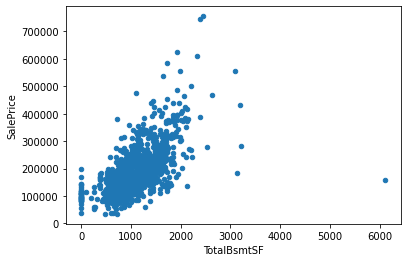

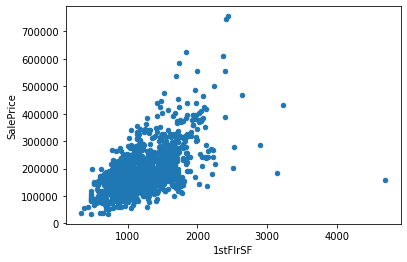

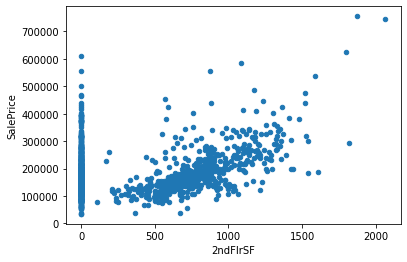

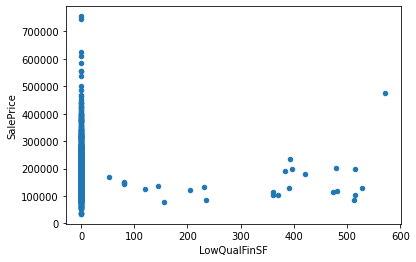

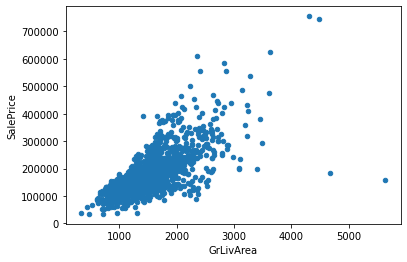

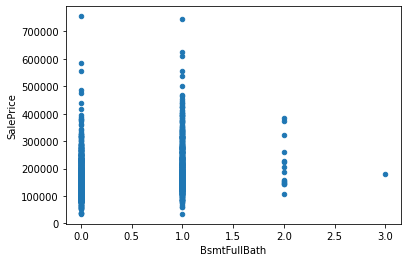

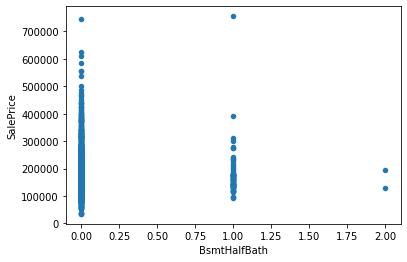

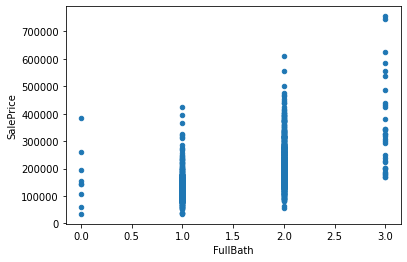

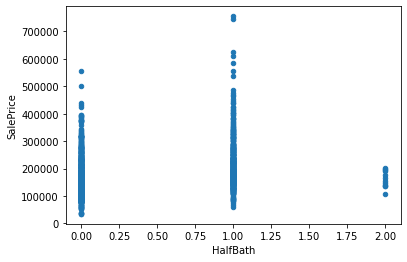

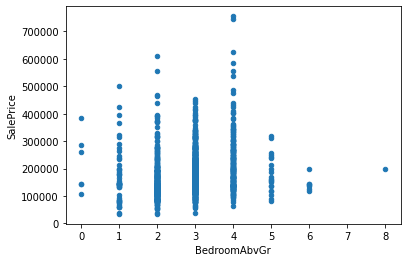

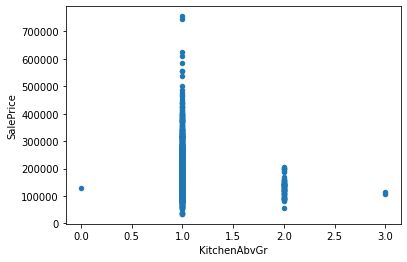

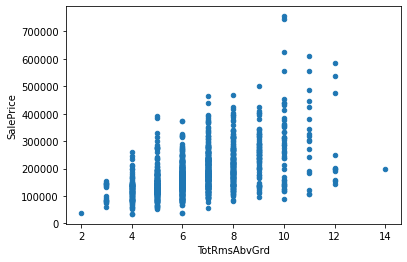

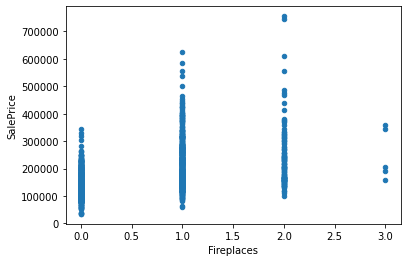

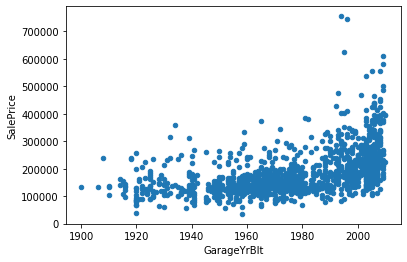

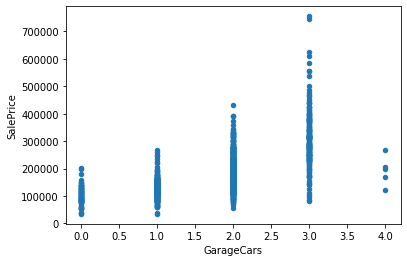

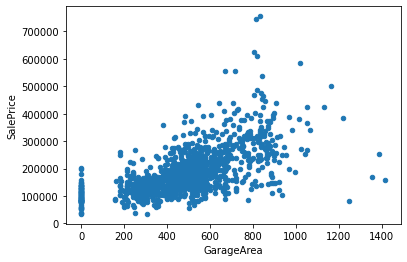

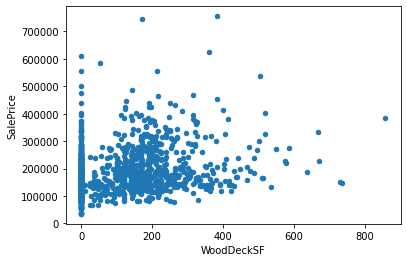

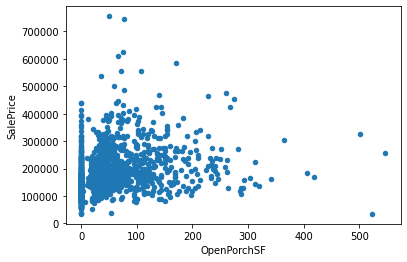

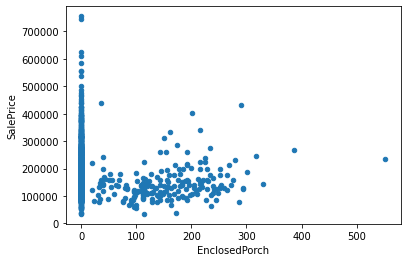

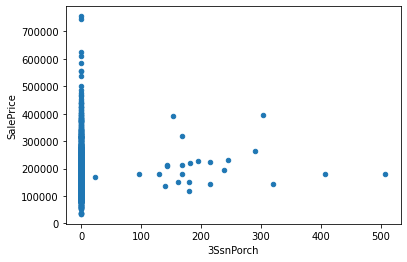

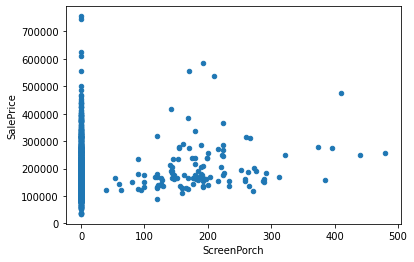

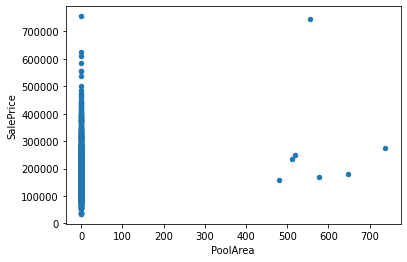

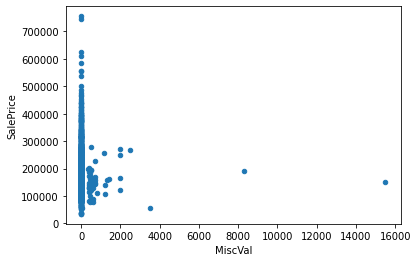

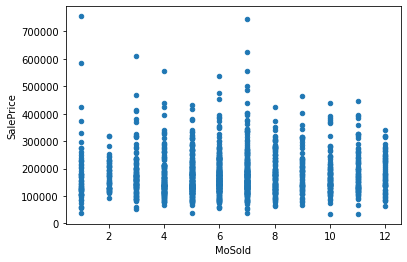

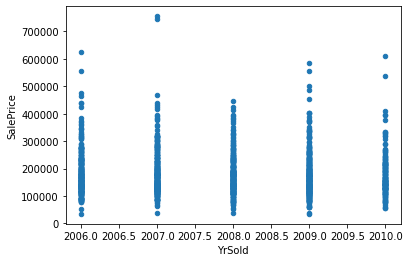

In [8]:
# Boxplot the target numeric variable distribution for categorical features
for column in categorical_object+categorical_numeric:
    sns.catplot(x=column, y=target, kind="violin", data=df)  
    plt.show()

# Scatter plot with numeric variables
for column in continuous:
    df.plot(kind='scatter', x=column, y=target)

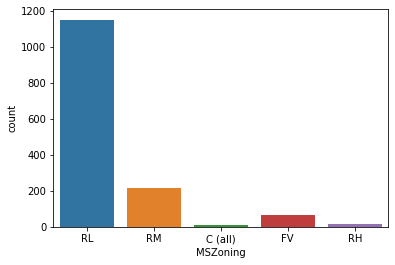

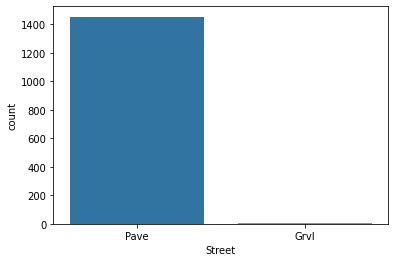

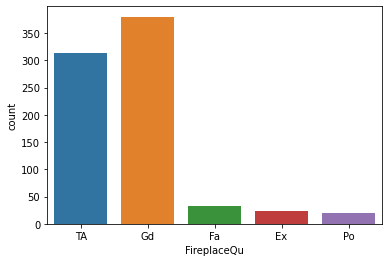

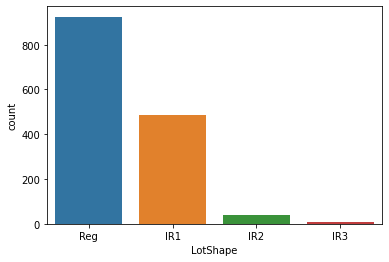

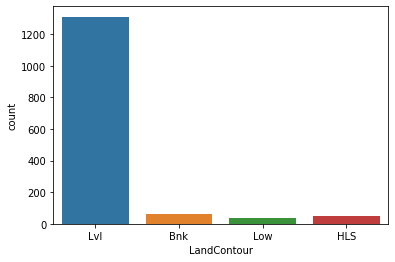

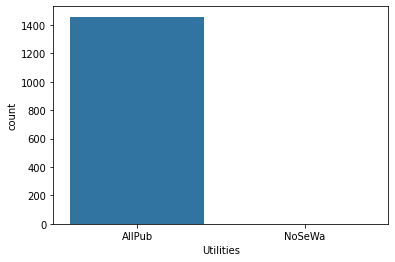

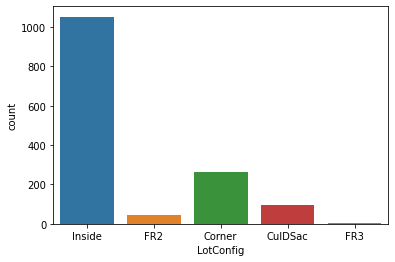

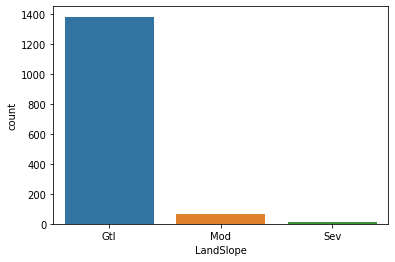

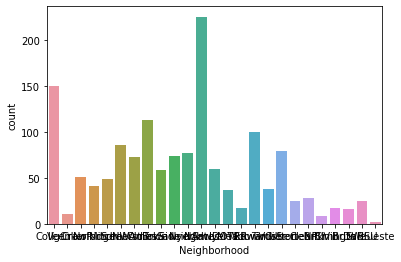

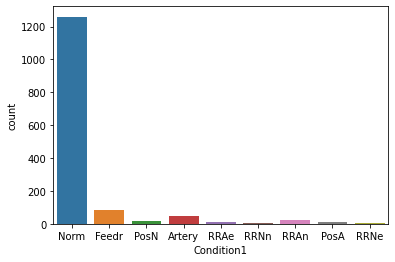

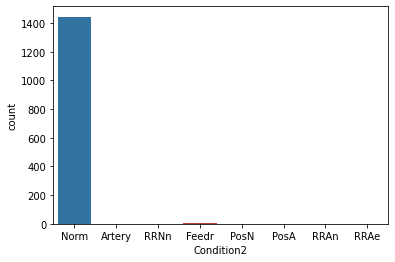

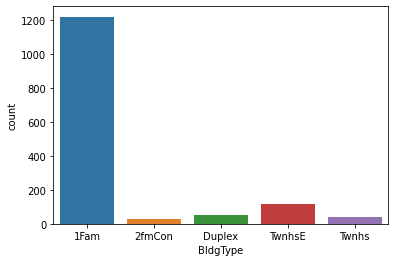

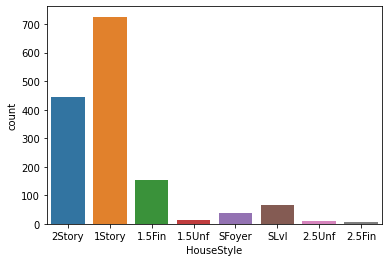

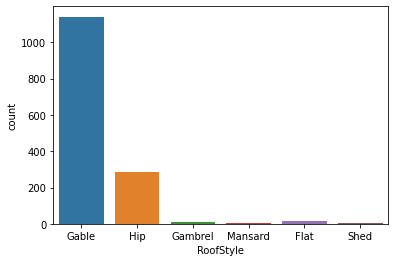

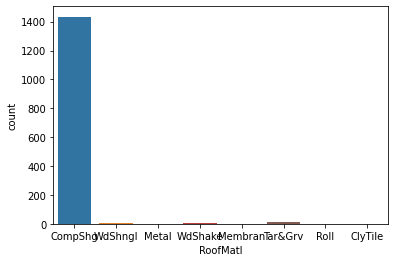

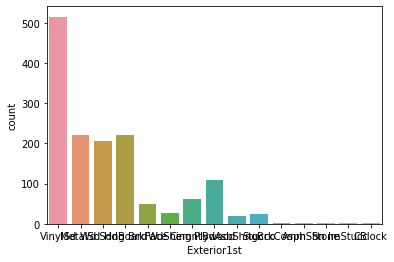

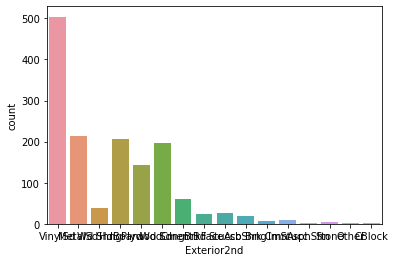

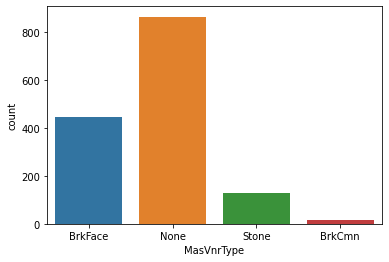

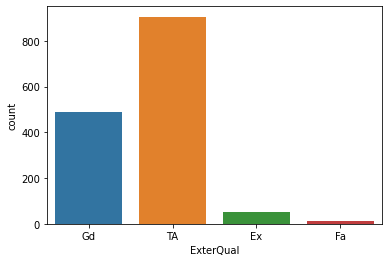

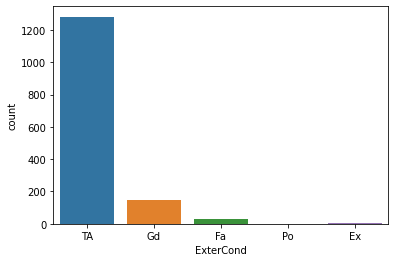

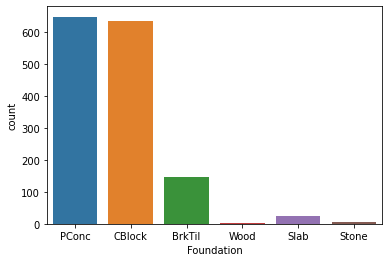

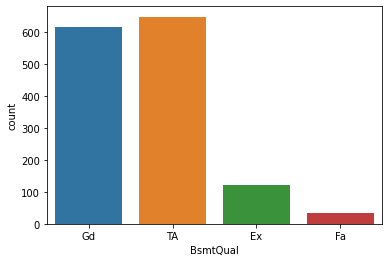

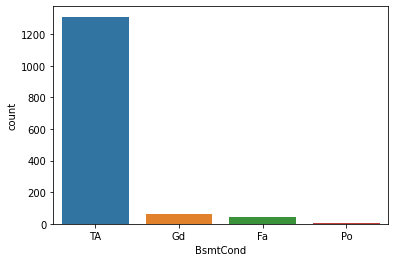

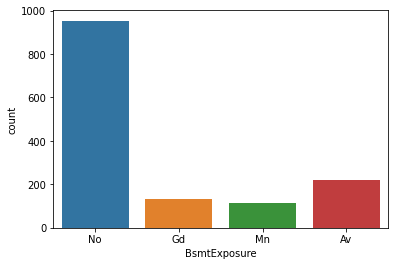

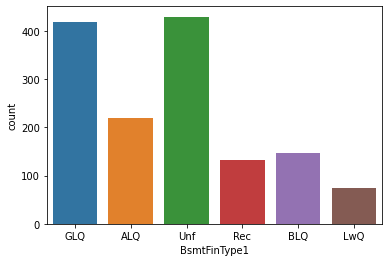

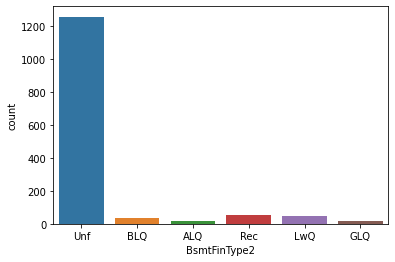

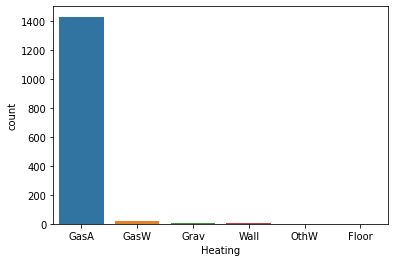

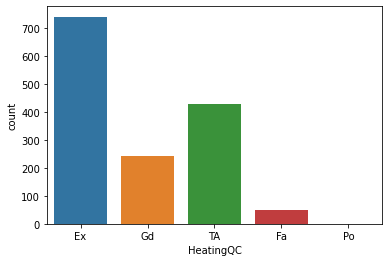

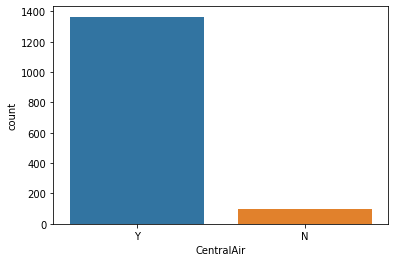

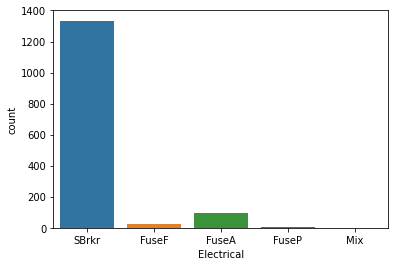

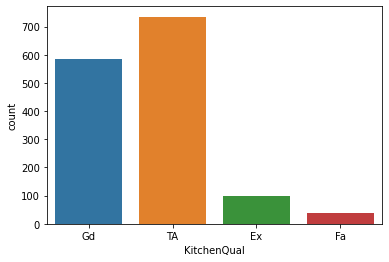

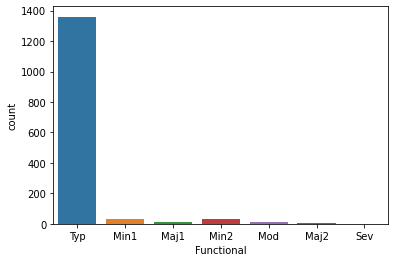

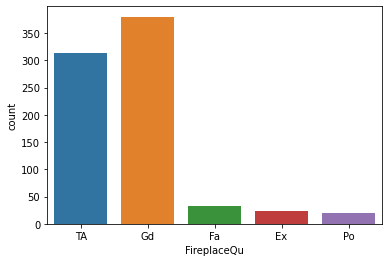

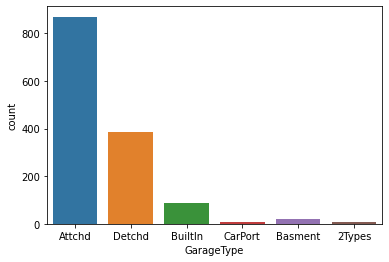

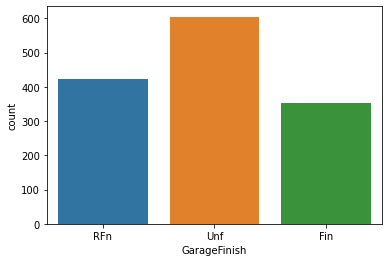

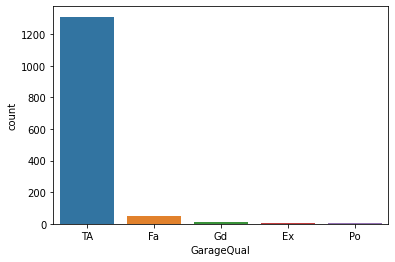

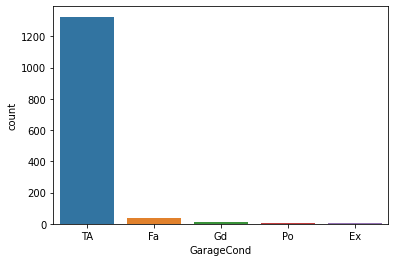

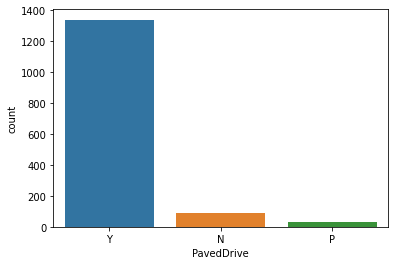

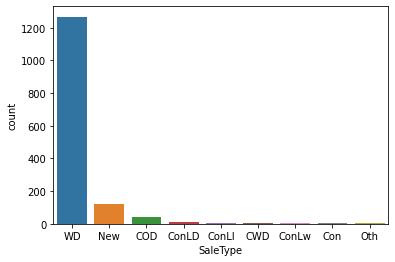

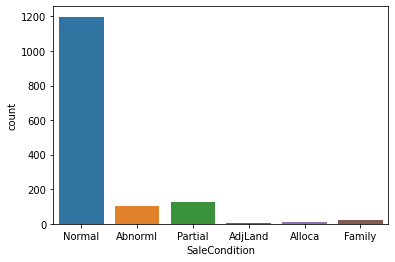

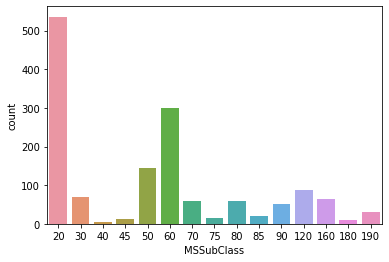

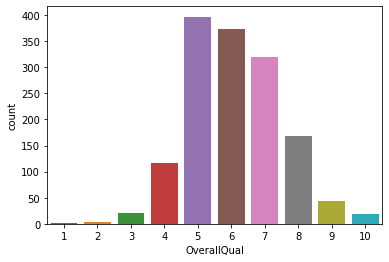

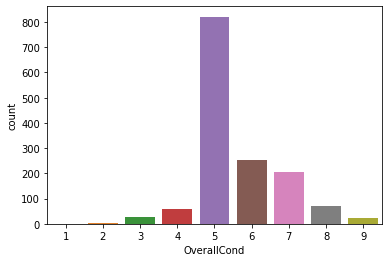

In [9]:
# Categorical value counts
for column in categorical_object+categorical_numeric: 
    sns.countplot(x=column, data=df) 
    plt.show()


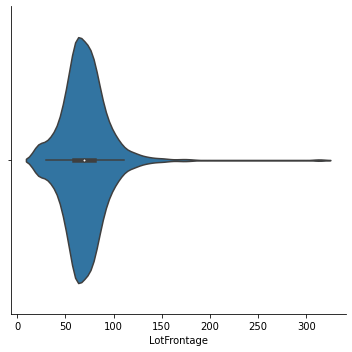

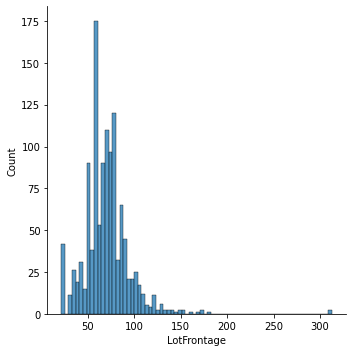

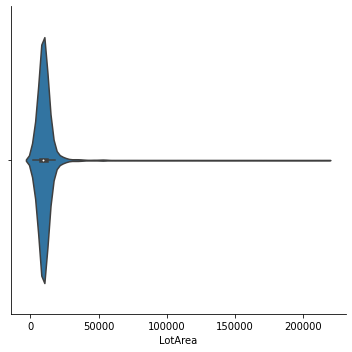

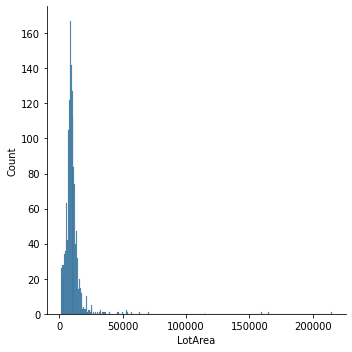

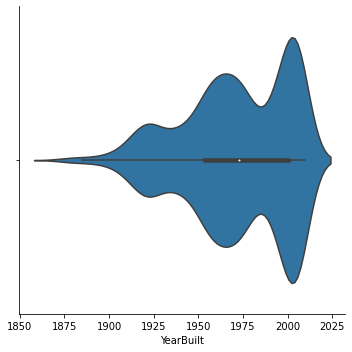

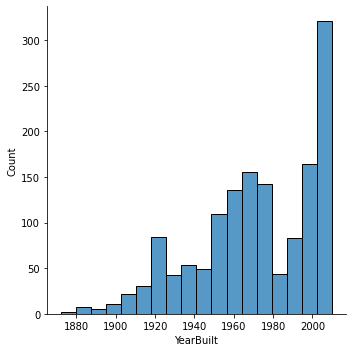

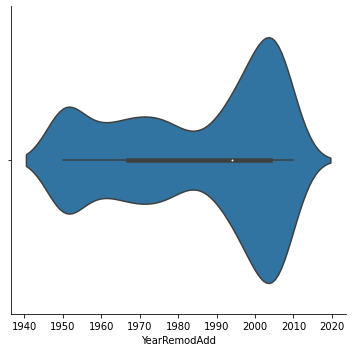

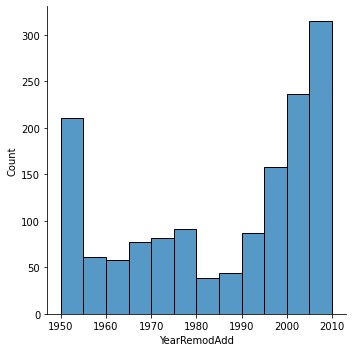

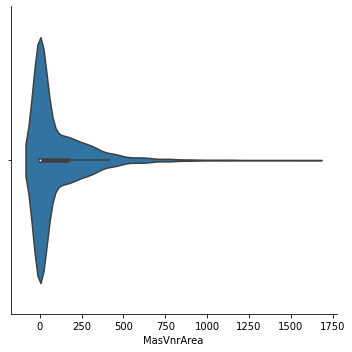

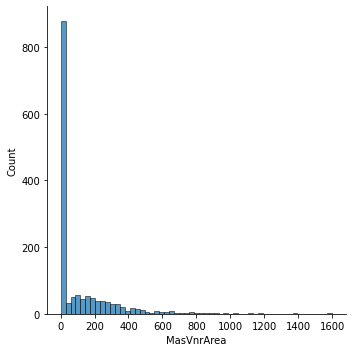

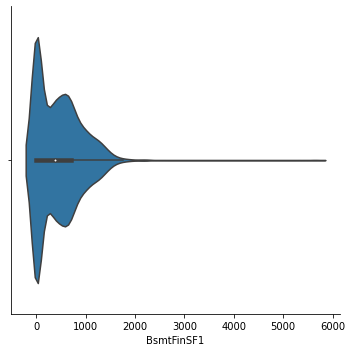

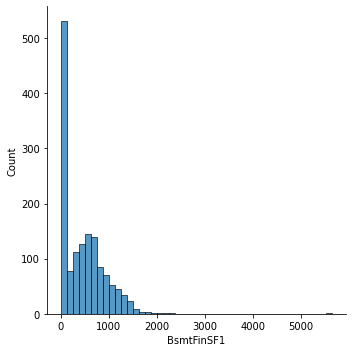

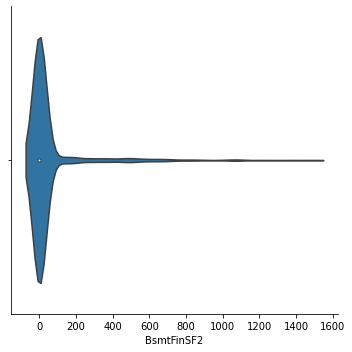

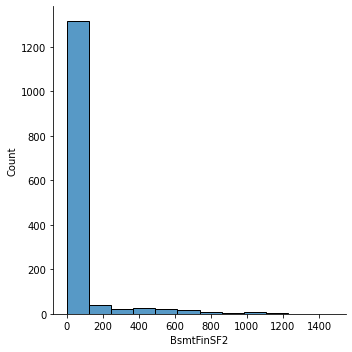

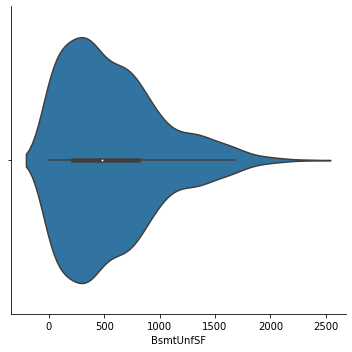

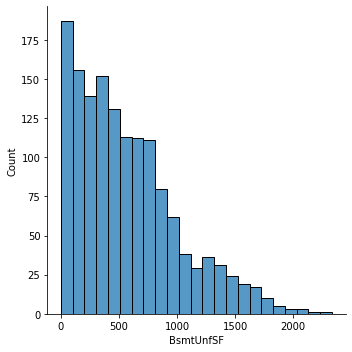

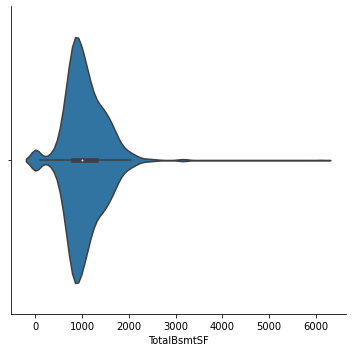

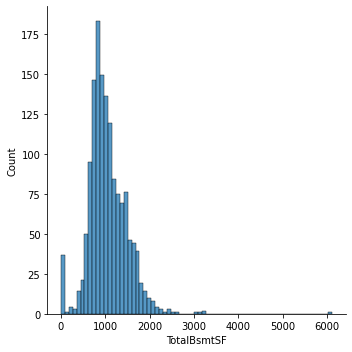

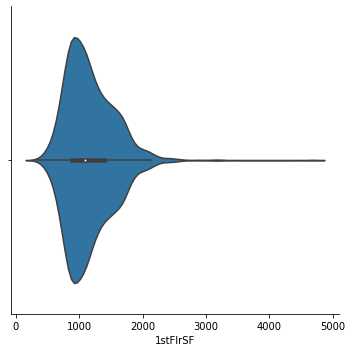

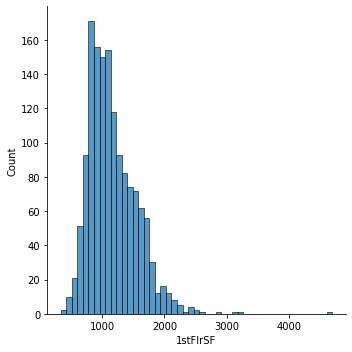

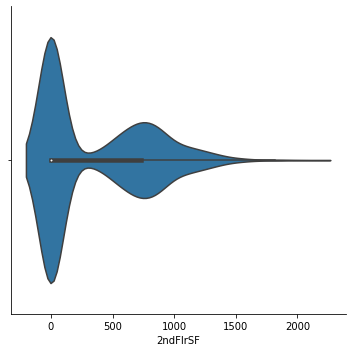

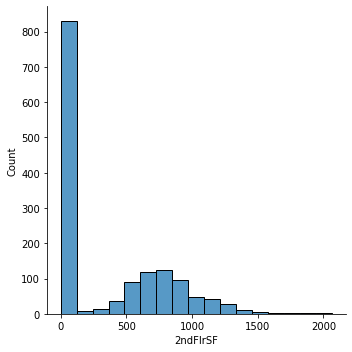

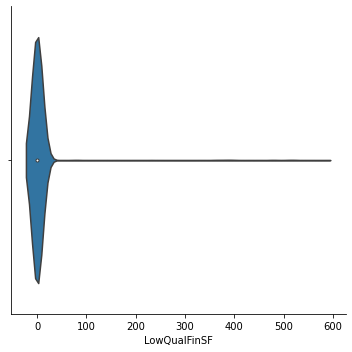

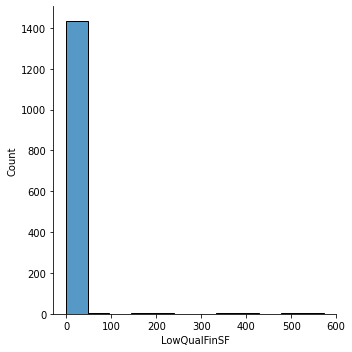

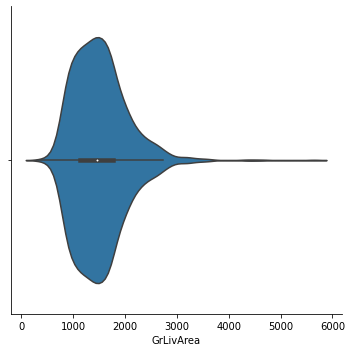

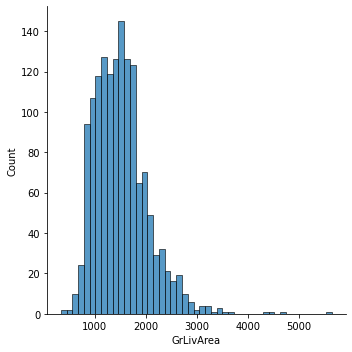

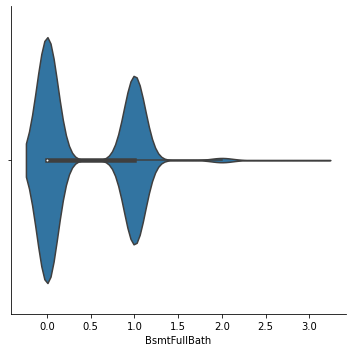

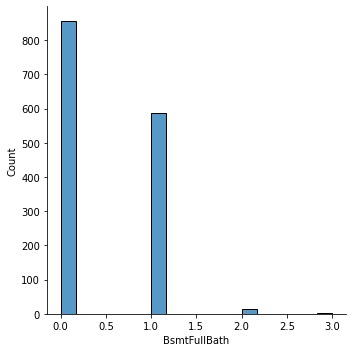

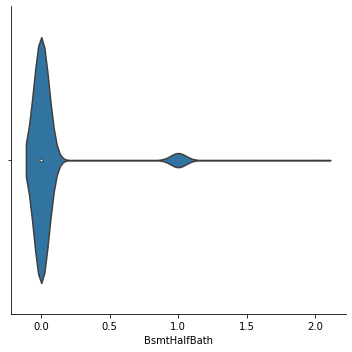

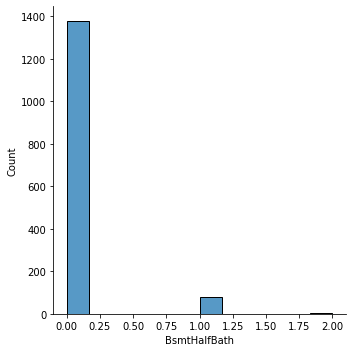

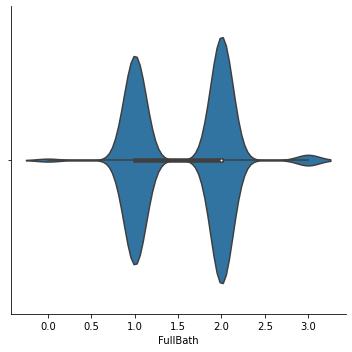

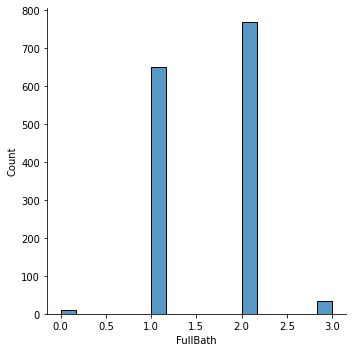

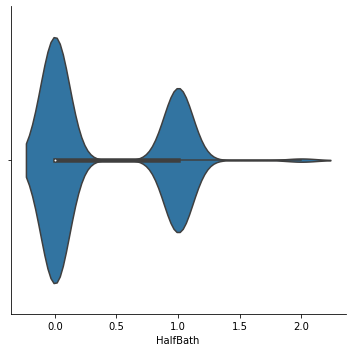

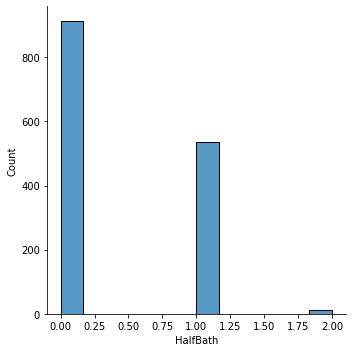

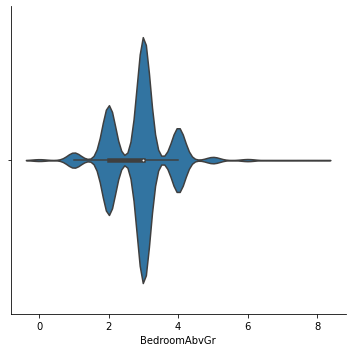

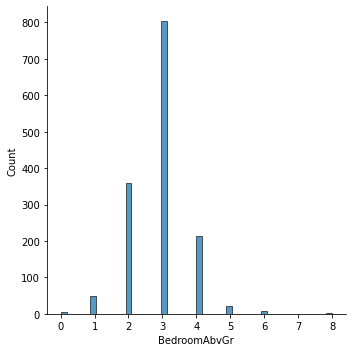

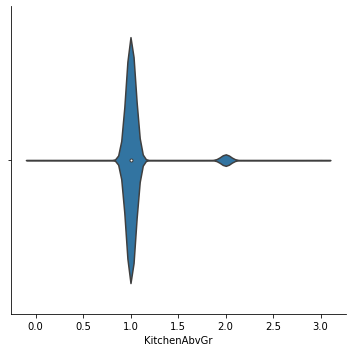

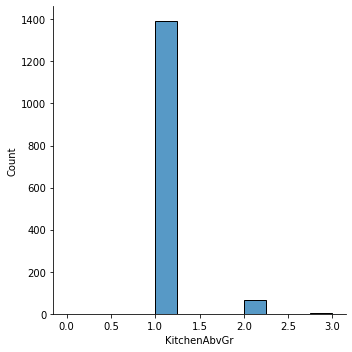

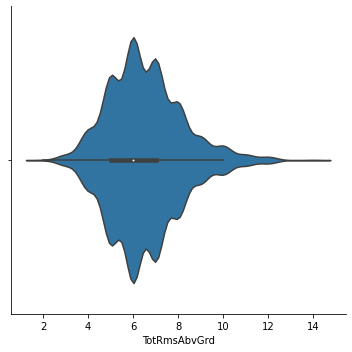

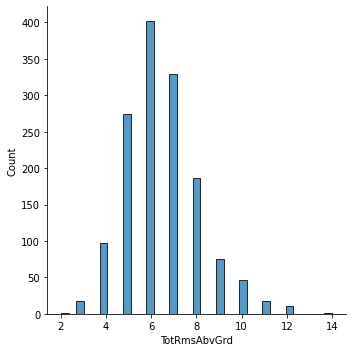

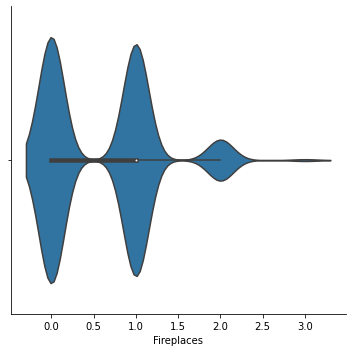

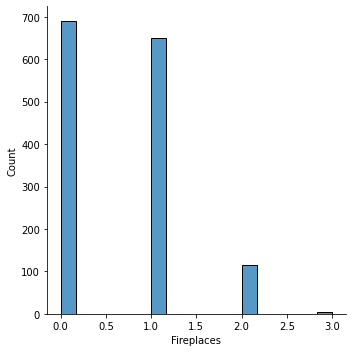

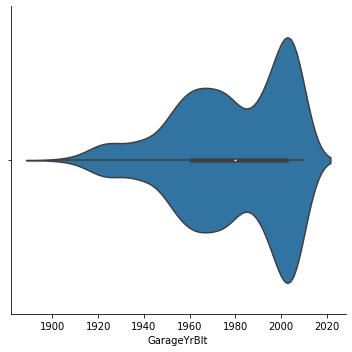

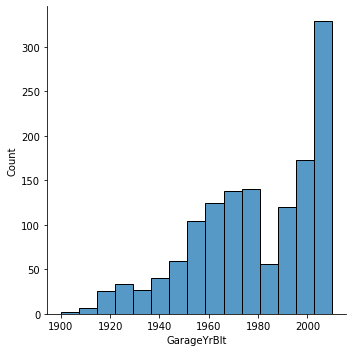

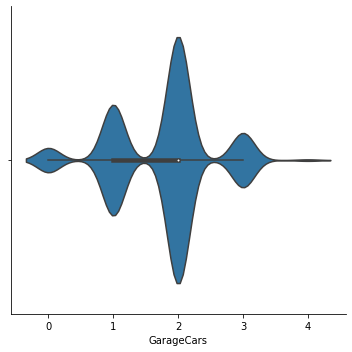

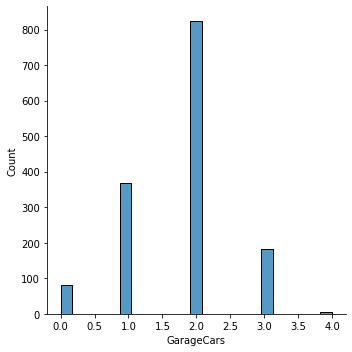

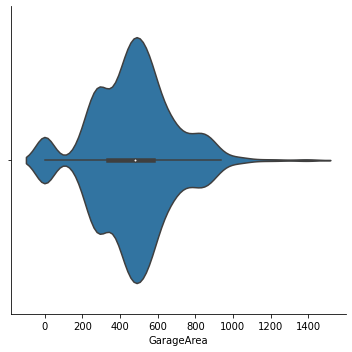

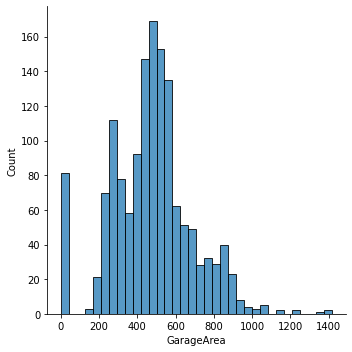

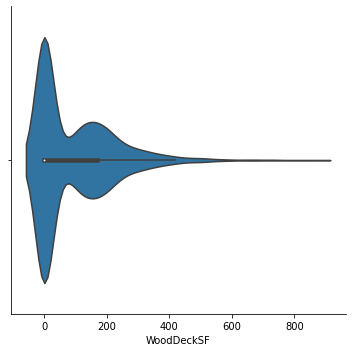

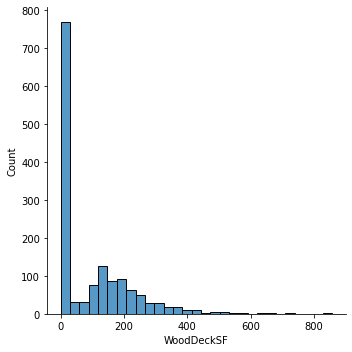

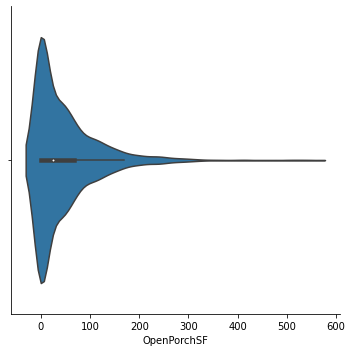

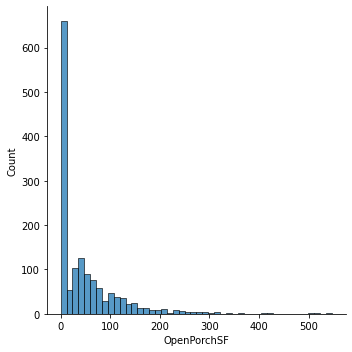

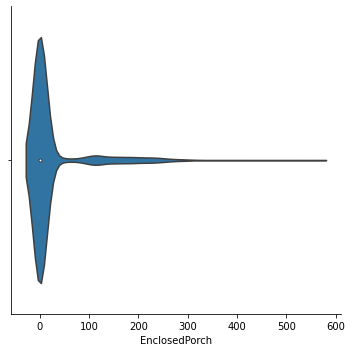

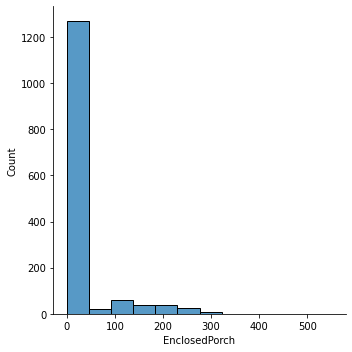

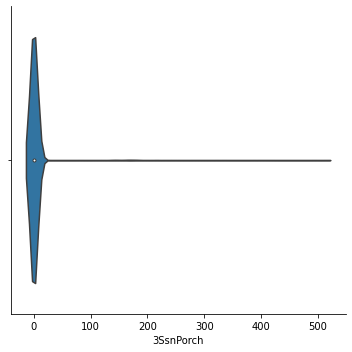

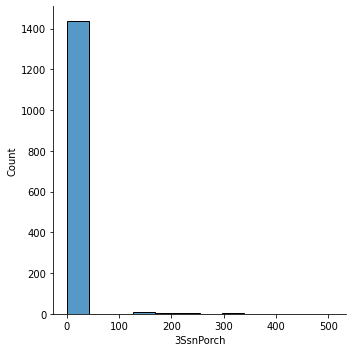

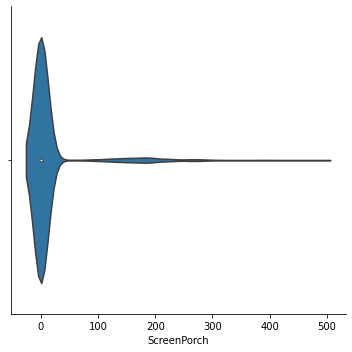

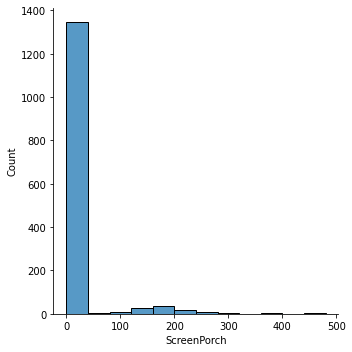

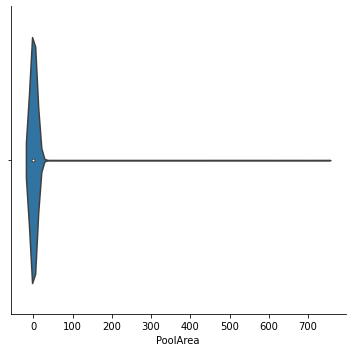

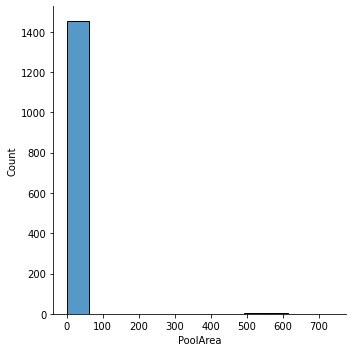

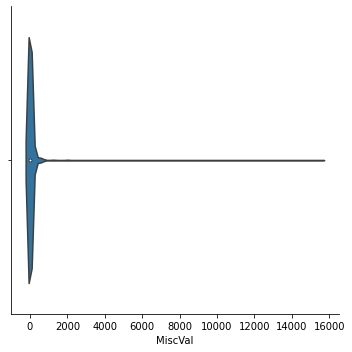

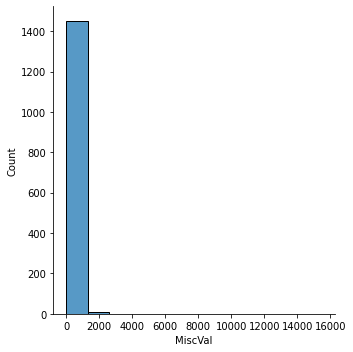

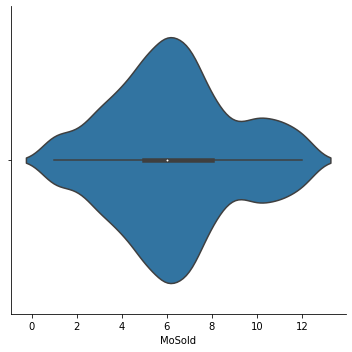

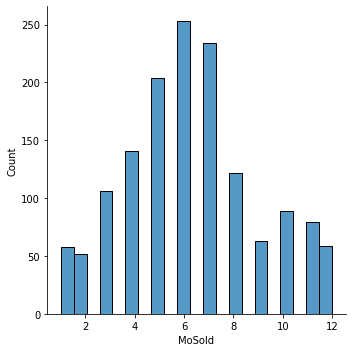

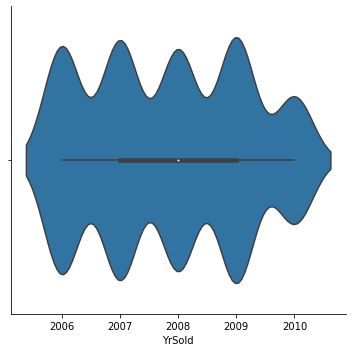

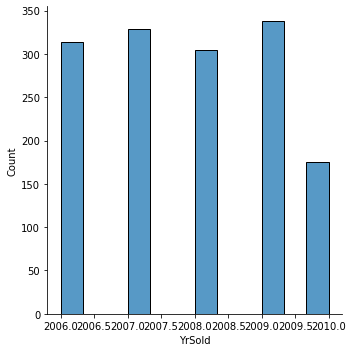

In [10]:
# Boxplot and distribution for continuous variables
for column in continuous:
    sns.catplot(x=column, kind="violin", data=df)
    sns.displot(df[column])
    plt.show()